Artificial dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
data1 = pd.read_csv("/content/implementation_correctness_dataset.csv")
X = data1[['Feature 1', 'Feature 2']].values
'''normalized_data = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(normalized_data)'''
y=data1['Class/Cluster']

Real dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

a=pd.read_csv("/content/data (1).csv")
data = a.drop(columns=['id','Unnamed: 32'],axis=1)
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data_index = pd.DataFrame(preprocessing.scale(data.iloc[:,1:30]))
data_index.columns = list(data.iloc[:,1:30].columns)
data_index['diagnosis'] = data['diagnosis']
data_use = data_index.drop('diagnosis',axis=1)
B=np.array(data_use)

tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
B = tsne.fit_transform(B)
B = StandardScaler().fit_transform(B)
# apply PCA to reduce dimensionality to k components
k = 2
pca = PCA(n_components=k)
B= pca.fit_transform(B)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.494308
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.113853
[t-SNE] KL divergence after 1800 iterations: 0.847138


In [ ]:
# We create a function to calculate euclidean distance between all the points and store them in an array called distances.
# V = sqrt((x2 - x1)^2 + (y2 - y1)^2) where (x1, y1) and (x2, y2) are the coordinates of the two points.
def euclidean_distance(distances, X, n):
    for i in range(n):
        for j in range(n):
            v=np.sum((X[i]-X[j])**2)
            distances[i,j] = np.sqrt(v)
    return distances

In [ ]:
# We write this function to create an adjacency matrix, of size n*n.
def create_adj_matrix(k_indices,n,AM):
    for i in range(n):
        AM[i, k_indices[i]] = 1
        AM[k_indices[i], i] = 1
    return AM

Implementation Correctness-Part 1 (adjacency matrix)

In [ ]:
# Here we write a function knearneightbours which creates a matrix of size n*n and computes the euclidean distances
# and sorts them accordingly and stores the indices of the k nearest neighbours in an array and with
# this array we construct an adjacency matrix .


import numpy as np
def knearneighbors(X, k):
    n = X.shape[0]
    #A matrix with zeroes is created with size n
    zero_matrix = np.zeros((n, n))
    #  euclidean distance function is called to compute distance
    distances=euclidean_distance(np.copy(zero_matrix),X,n)
    #Sort the distances to obtain the indices of the k closest neighbors.
    sorted_indices = np.argsort(distances, axis=1)
    k_indices = sorted_indices[:, 1:k+1]
    # Construct the adjacency matrix-function to create adjacency matrix is created
    AM =create_adj_matrix(k_indices,n,np.copy(zero_matrix))
    return AM
#adjacency matrix for artificial dataset
Adj_Matrix= knearneighbors(X, 2)
print(Adj_Matrix)
#adjacency matrix for real dataset
Adj_Matrix1=knearneighbors(B, 2)
#print(Adj_Matrix1)


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]]


In [ ]:
#It is created by summing the values in each row and putting them in a diagnol
def createdegreematrix(Adj_Matrix):
    degreematrix=np.diag(np.sum(Adj_Matrix,axis=1))
    return degreematrix


In [ ]:
#L = D - A
def createlaplacianmatrix(degreematrix,Adj_Matrix):
    laplacianmatrix=degreematrix-Adj_Matrix
    return laplacianmatrix

In [ ]:
#calculates the square root of its inverse of degree matrix
def inversesquare(degreematrix):
    sqri=np.linalg.inv(np.sqrt(degreematrix))
    return sqri

In [ ]:
def normalizeeigen(matrix):
    vals, vecs = np.linalg.eigh(matrix)
    #k=2
    #ab=vals.argsort()[:2]
    em = vecs[:,:2]

    # Normalize the eigenvectors
    #em = vecs / np.linalg.norm(vecs, axis=0)

    # Print the spectral embeddings
    return em

In [ ]:
#functions to get eigen vectors(spectral embeddings) for artificial dataset
degreematrix=createdegreematrix(Adj_Matrix)
laplacianmatrix=createlaplacianmatrix(degreematrix,Adj_Matrix)
sqri=inversesquare(degreematrix)
normalizedlaplacian=sqri@laplacianmatrix@sqri
em=normalizeeigen(normalizedlaplacian)

#functions to get eigen vectors(spectral embeddings) for Real dataset
degreematrix1=createdegreematrix(Adj_Matrix1)
laplacianmatrix1=createlaplacianmatrix(degreematrix1,Adj_Matrix1)
sqri1=inversesquare(degreematrix1)
normalizedlaplacian1=sqri1@laplacianmatrix1@sqri1
em1=normalizeeigen(normalizedlaplacian1)


Implementation Correctness-Part 2 (Spectral Embeddings)

In [ ]:
def calculate(sigma, distance_pairs,X):
    W=np.exp(-distance_pairs/(2 * sigma**2))
    D=np.diag(np.sum(W,axis=1))
    L=D-W
    eigvals,eigvecs =np.linalg.eigh(L)
    idx=eigvals.argsort()[:2]
    z=eigvecs[:, idx]
    return z


In [ ]:
def eigenvector(X):
    sigma=1
    distance_pairs=np.square(np.linalg.norm(X[:,np.newaxis]-X,axis=2))
    return calculate(sigma, distance_pairs,X)
z=eigenvector(X)
print(z)

[[-0.24253563  0.19095478]
 [-0.24253563  0.15620674]
 [-0.24253563  0.09361891]
 [-0.24253563  0.02598101]
 [-0.24253563 -0.05864059]
 [-0.24253563 -0.16618812]
 [-0.24253563 -0.27010071]
 [-0.24253563 -0.357609  ]
 [-0.24253563 -0.42152545]
 [-0.24253563 -0.46120255]
 [-0.24253563  0.2125787 ]
 [-0.24253563  0.24965678]
 [-0.24253563  0.28919668]
 [-0.24253563  0.3216502 ]
 [-0.24253563  0.05891701]
 [-0.24253563  0.0661269 ]
 [-0.24253563  0.07037869]]


Part-4-Implementation correctness(plot between objective functions and iteration)

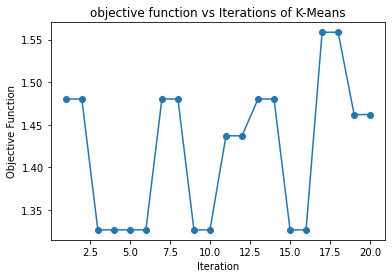

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, n_clusters, max_iter=10, init='random'):
    # Initialize centroids
    if init == 'random':
        centroids = X[np.random.choice(X.shape[0], size=n_clusters, replace=False), :]
    else:
        centroids = init

    for i in range(max_iter):
        # Compute distances to centroids
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))

        # Assign each point to closest centroid
        labels = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.vstack([X[labels==j,:].mean(axis=0) for j in range(n_clusters)])
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids
    # Compute and return objective function
    obj_func = ((X - centroids[labels,:])**2).sum()
    return obj_func, labels, centroids
obj_func = []
obj_func1 = []
for i in range(10):
    obj, labels, centroids = kmeans(z, 2,10)
    obj1, labels1, centroids1 = kmeans(em1, 2,10)
    obj2 , labels2, centroids2= kmeans(em, 2 ,10)
    obj_func.append(obj1)
    obj_func1.append(obj2)

#print(labels)
plt.plot(np.arange(2*10) + 1, np.repeat(obj_func, 2), '-o')
plt.title('objective function vs Iterations of K-Means')
plt.xlabel('Iteration')
plt.ylabel('Objective Function')
plt.show()

Part-4-Implementation correctness(Scatterplot for speactral embeddings based on the cluster that k-means)

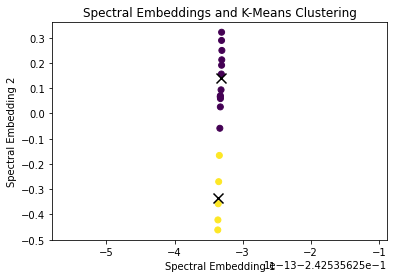

In [ ]:
plt.scatter(z[:, 0], z[:, 1], c=labels, cmap='viridis')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black')

plt.xlabel('Spectral Embedding 1')
plt.ylabel('Spectral Embedding 2')
plt.title('Spectral Embeddings and K-Means Clustering')

plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import normalized_mutual_info_score
#silhoutte score for real dataset
silhouette_avg = silhouette_score(B,labels1)
print("Silh for real data:",silhouette_avg)
#silhoutte score for artificial dataset
silhouette_avg1 = silhouette_score(X,labels)
print("Silh for artificial data:",silhouette_avg1)
#nmi score for real dataset
nmi_score = normalized_mutual_info_score(y,labels)
print("NMI for real data:",nmi_score)
#nmi score for artificial dataset
nmi_score1 = normalized_mutual_info_score(data['diagnosis'],labels1)
print("NMI for artificial data",nmi_score1)

Silh for real data: 0.12883154
Silh for artificial data: 0.5300117189896503
NMI for real data: 0.1288617483267018
NMI for artificial data 0.003869495440379112


In [ ]:
ss=[]
ns=[]
for i in range(0,10):
  np.random.shuffle(B)
  s_s=silhouette_score(B,labels1)
  ss.append(s_s)
  n_s=normalized_mutual_info_score(data['diagnosis'],labels1)
  ns.append(n_s)
print(ss)
print(ns)


[-0.021898752, -0.021574255, -0.00511418, -0.012507279, 0.0013347259, -0.02223951, 0.009013113, -0.01820609, 0.0069090957, 0.013200471]
[0.003869495440379112, 0.003869495440379112, 0.003869495440379112, 0.003869495440379112, 0.003869495440379112, 0.003869495440379112, 0.003869495440379112, 0.003869495440379112, 0.003869495440379112, 0.003869495440379112]


silhouette scores std (std=0.01)


Text(0.5, 1.0, 'Error bar for silhoutte score')

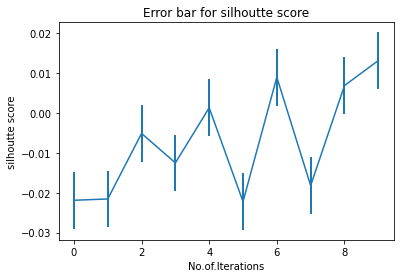

In [ ]:
plt.errorbar(x = list(range(0, 10)), y = ss, yerr = sum(ss)/len(ss)
            , elinewidth = 2)
print(f'silhouette scores std (std={np.std(ss):.2f})')
plt.xlabel("No.of.Iterations")
plt.ylabel("silhoutte score")
plt.title("Error bar for silhoutte score")

NMI scores std (std=0.00)


Text(0.5, 1.0, 'Error bar for NMI score')

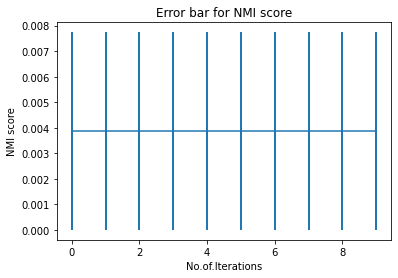

In [ ]:
plt.errorbar(x =  list(range(0, 10)), y = ns, yerr = sum(ns)/len(ns)
            , elinewidth = 2)
print(f'NMI scores std (std={np.std(ns):.2f})')
plt.xlabel("No.of.Iterations")
plt.ylabel("NMI score")
plt.title("Error bar for NMI score")